### Download german spacy pipeline

In [1]:
!python -m spacy download de_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.8/567.8 MB 14.5 MB/s eta 0:00:0000:0100:03
You should consider upgrading via the '/Users/jannis/opt/miniconda3/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_lg')


In [2]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import spacy
import re
import umap
nlp = spacy.load('de_core_news_lg')

/Users/jannis/opt/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv("/Users/jannis/ASUD_Cyberbullying/prepared_dataframe.csv")

In [4]:
df.head()

,tweet,binaereKlassifikation,granulareKlassifikation,Wörter in Tweet,Wörter pro Tweet,Tweets ohne Satzzeichen,Wortlänge,Durchschnittliche Wortlänge,Verlinkungen,Verlinkung pro Tweet,Hashtags,Hashtags pro Tweet,utf Codes,utf Codes pro Tweet,Emojis,Emojis pro Tweet
0,@JanZimmHHB @mopo Komisch das die Realitätsver...,OFFENSE,INSULT,"['komisch', 'das', 'die', 'realitätsverweigeru...",11,"['Komisch', 'das', 'die', 'Realitätsverweigeru...","[7, 3, 3, 21, 5, 3, 6, 12, 9, 8, 7]",7.64,"['@JanZimmHHB', '@mopo']",2,[],0,[],0,[],0
1,@faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...,OFFENSE,ABUSE,"['cdu', 'steht', 'seid', 'strauss,', 'kohl,', ...",13,"['CDU', 'steht', 'seid', 'Strauss', 'Kohl', 'S...","[3, 5, 4, 7, 4, 8, 7, 3, 10, 11, 3, 4, 7]",5.85,"['@faznet', '@Gruene_Europa', '@SPDEuropa', '@...",4,[],0,[],0,[],0
2,"@DLFNachrichten Die Gesichter, Namen, Religion...",OTHER,OTHER,"['die', 'gesichter,', 'namen,', 'religion', 'd...",10,"['Die', 'Gesichter', 'Namen', 'Religion', 'der...","[3, 9, 5, 8, 3, 5, 5, 3, 10, 9]",6.00,['@DLFNachrichten'],1,[],0,[],0,[],0
3,@welt Wie verwirrt muss man sein um sich zu we...,OFFENSE,ABUSE,"['wie', 'verwirrt', 'muss', 'man', 'sein', 'um...",28,"['Wie', 'verwirrt', 'muss', 'man', 'sein', 'um...","[3, 8, 4, 3, 4, 2, 4, 2, 7, 3, 9, 12, 3, 6, 4,...",5.43,['@welt'],1,[],0,[],0,[],0
4,@hacker_1991 @torben_braga Weil die AfD den Fe...,OFFENSE,ABUSE,"['weil', 'die', 'afd', 'den', 'ferkelfunk', 'a...",30,"['Weil', 'die', 'AfD', 'den', 'Ferkelfunk', 'a...","[4, 3, 3, 3, 10, 10, 4, 7, 5, 3, 6, 6, 11, 5, ...",5.17,"['@hacker_1991', '@torben_braga']",2,[],0,[],0,[],0


In [5]:
df.granulareKlassifikation.value_counts()

OTHER        2061
INSULT        459
ABUSE         400
PROFANITY     111
Name: granulareKlassifikation, dtype: int64

## Wordclouds for every Category

In [6]:
# Wordcloud without stopwords
data = df
german_stopwords = stopwords.words("german")
sw = set(STOPWORDS)

# drop unicode emojis
new_tweet_ls = []
for tweet in data.tweet:
    tweet_sp = tweet.split()
    for word in tweet_sp:
        if "000" in word:
            tweet = tweet.replace(word, "")
    new_tweet_ls.append(tweet)

data_wc = data
data_wc["tweet"] = new_tweet_ls

# Create a word cloud for every category
wc_OTHER = WordCloud(max_font_size=50, max_words=100, background_color="white",
                     stopwords=german_stopwords).generate(str(data_wc[data_wc["binaereKlassifikation"] == "OTHER"]["tweet"].values))
wc_OFFENSE = WordCloud(max_font_size=50, max_words=100, background_color="white",
                       stopwords=german_stopwords).generate(str(data_wc[data_wc["binaereKlassifikation"] == "OFFENSE"]["tweet"].values))
wc_insult = WordCloud(max_font_size=50, max_words=100, background_color="white",
                       stopwords=german_stopwords).generate(str(data_wc[data_wc["granulareKlassifikation"] == "INSULT"]["tweet"].values))
wc_abuse = WordCloud(max_font_size=50, max_words=100, background_color="white",
                       stopwords=german_stopwords).generate(str(data_wc[data_wc["granulareKlassifikation"] == "ABUSE"]["tweet"].values))
wc_profanity = WordCloud(max_font_size=50, max_words=100, background_color="white",
                       stopwords=german_stopwords).generate(str(data_wc[data_wc["granulareKlassifikation"] == "PROFANITY"]["tweet"].values))



### OTHER

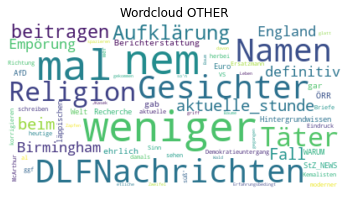

In [7]:
# plot word clouds
plt.imshow(wc_OTHER, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud OTHER")
plt.show()

### OFFENSE

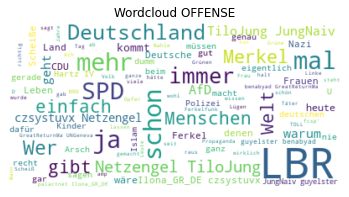

In [8]:
plt.imshow(wc_OFFENSE, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud OFFENSE")
plt.show()

### INSULT

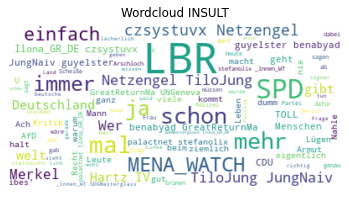

In [9]:
plt.imshow(wc_insult, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud INSULT")
plt.show()

### ABUSE

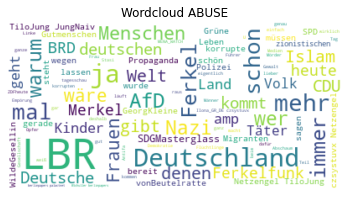

In [10]:
plt.imshow(wc_abuse, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud ABUSE")
plt.show()

### PROFANITY

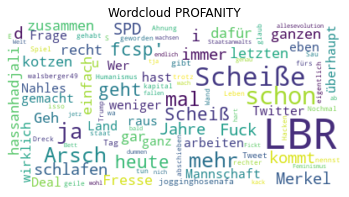

In [11]:
plt.imshow(wc_profanity, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud PROFANITY")
plt.show()

In [12]:
# preprocess the tweets
def process_tweets(tweet : str):
    # all lowercase
    tweet = tweet.lower()
    # remove Sonderzeichen etc (based on Sonderzeichen.txt)
    tweet = re.sub('[^a-zA-ZäöüÄÖÜß]', " ", tweet)
    return tweet

In [13]:
# split data in training and test
data_train = data.sample(round(0.75 * len(data)), random_state = 1).reset_index()
data_test = data[~data.index.isin(data_train.index)].reset_index()


In [14]:
data_pre = data_train
data_pre["tweet"] = [process_tweets(tweet) for tweet in data_pre["tweet"]]

In [15]:
data_pre.head()

,index,tweet,binaereKlassifikation,granulareKlassifikation,Wörter in Tweet,Wörter pro Tweet,Tweets ohne Satzzeichen,Wortlänge,Durchschnittliche Wortlänge,Verlinkungen,Verlinkung pro Tweet,Hashtags,Hashtags pro Tweet,utf Codes,utf Codes pro Tweet,Emojis,Emojis pro Tweet
0,1192,ich glüh vor mit laphroaig,OTHER,OTHER,"['ich', 'glüh', 'vor', 'mit', 'laphroaig']",5,"['ich', 'glüh', 'vor', 'mit', 'Laphroaig']","[3, 4, 3, 3, 9]",4.4,[],0,[],0,[],0,[],0
1,2645,ein egomane nutzt jede gelegenheit um im mit...,OFFENSE,INSULT,"['ein', 'egomane.', 'nutzt', 'jede', 'gelegenh...",41,"['Ein', 'Egomane', 'Nutzt', 'jede', 'Gelegenhe...","[3, 7, 5, 4, 11, 2, 2, 11, 2, 6, 6, 4, 13, 5, ...",5.2,[],0,[],0,[],0,[],0
2,2061,vulgaerbahamit instant bock in ski urlaub zu ...,OTHER,OTHER,"['instant', 'bock', 'in', 'ski', 'urlaub', 'zu...",11,"['instant', 'bock', 'in', 'ski', 'urlaub', 'zu...","[7, 4, 2, 3, 6, 2, 6, 4, 2, 3, 5]",4.0,['@Vulgaerbahamit'],1,[],0,[],0,[],0
3,1574,k schwester dvds ja lbr denn lyzi...,OTHER,OTHER,"['ja.', 'denn', 'lyzianer', '=', 'bolschewisten']",5,"['Ja', 'Denn', 'Lyzianer', '', 'Bolschewisten']","[2, 4, 8, 0, 13]",5.4,"['@k1schwester', '@dvds72439334']",2,[],0,[],0,[],0
4,1142,toteraufurlaub togliatti unter stalin hätt...,OFFENSE,ABUSE,"['unter', 'stalin', 'hätte', 'er', 'die', 'gan...",10,"['unter', 'Stalin', 'hätte', 'er', 'die', 'gan...","[5, 6, 5, 2, 3, 5, 8, 7, 5, 6]",5.2,"['@toteraufurlaub', '@togliatti47']",2,[],0,[],0,[],0


In [16]:
# create spacy docs with a nlp pipeline
tweet_docs = [nlp(tweet) for tweet in data_pre["tweet"]]

In [79]:
tweet_docs

[ich glüh vor mit laphroaig,
 ein egomane  nutzt jede gelegenheit  um im mittelpunkt zu stehen  wendet dazu rücksichtslos jedes noch so perfide mittel an   lbr  den eigentlich schönsten tag im leben von sohn   ruiniert er erfolgreich absichtlich  brutal  um wieder gesprächsthema nr   zu sein   lbr     ,
  vulgaerbahamit instant bock in ski urlaub zu fahren aber in den   ern,
  k schwester  dvds         ja   lbr  denn lyzianer   bolschewisten,
  toteraufurlaub  togliatti   unter stalin hätte er die ganze autobahn alleine bauen müssen,
  reconquista e  torsten          feindpresse dieses land ist am ende  ,
  egutkin wohin sie sich ihre antisemitismus keule stecken können  habe ich ihnen ja bereits verdeutlicht    und wer hier der faschist ist  ist am twitterfeed gut ablesbar ,
  egutkin und das von einem offensichtlichen fan diverser rechter und rechtsradikaler  dessen feed bände spricht   bruahahahahahaha   lbr  wenn du einen faschisten sehen willst  schau einfach in den spiegel ,
  ge

In [17]:
# extract the generated lemmas for words that are no stopwords and have a length of more than two
tweet_words = [
    [
    word.lemma_ for word in doc if ((not word.is_stop) and (len(word) >= 3))
    ]
    for doc in tweet_docs]

In [18]:
tweet_words

[['Glüh', 'Laphroaig'],
 ['egoman',
  'nutzen',
  'Gelegenheit',
  'Mittelpunkt',
  'stehen',
  'wenden',
  'rücksichtslos',
  'jeder',
  'perfid',
  'lbr',
  'eigentlich',
  'schön',
  'Leben',
  'Sohn',
  'ruinieren',
  'erfolgreich',
  'absichtlich',
  'brutal',
  'Gesprächsthema',
  'lbr',
  '    '],
 ['vulgaerbahamit', 'Instant', 'Bock', 'ski', 'Urlaub', 'fahren', 'ern'],
 ['Schwester', 'Dvds', '        ', 'lbr', 'lyzian', 'Bolschewist'],
 ['Toteraufurlaub', 'Togliatti', 'Stalin', 'Autobahn', 'alleine', 'bauen'],
 ['Reconquista', 'torsten', '         ', 'feindpresse', 'Land'],
 ['Egutkin',
  'wohin',
  'Antisemitismus',
  'Keule',
  'stecken',
  'verdeutlichen',
  '   ',
  'Faschist',
  'Twitterfeed',
  'ablesbar'],
 ['egutkin',
  'offensichtlich',
  'Fan',
  'diverser',
  'rechtsradikal',
  'Feed',
  'bände',
  'sprechen',
  'Bruahahahahahaha',
  'lbr',
  'Faschist',
  'sehen',
  'Schau',
  'einfach',
  'Spiegel'],
 ['georgkleine',
  'veritabel',
  'Vollmeise',
  'lbr',
  'sehen'

In [19]:
# create a word2vec model
word2vec = Word2Vec(tweet_words, min_count=3, sg=1, hs=0, negative=9,
                    ns_exponent=0.69, window=10, vector_size=60, epochs=80)

# train the model
word2vec.train(tweet_words, total_examples=word2vec.corpus_count, epochs=word2vec.epochs)

(1176723, 2146000)

In [20]:
# test word similarities
def test_word_sim(word_a, word_b):
    print(f'{word_a} | {word_b}: {word2vec.wv.similarity(word_a, word_b)}')
    
    
test_word_sim("CDU", "SPD")
test_word_sim("Korruption", "Europa")
test_word_sim("Afd", "Führer")
test_word_sim("Flüchtling", "Terror")

CDU | SPD: 0.80736243724823
Korruption | Europa: 0.16047784686088562
Afd | Führer: 0.19395223259925842
Flüchtling | Terror: 0.33412599563598633


In [21]:
# test2 word similarities
def test2_word_sim(word_list):
    print(f'{word_list}: {word2vec.wv.most_similar(positive=word_list, negative=[], topn = 5)}')
    
test2_word_sim(["Deutschland", "Merkel"])
test2_word_sim(["Flüchtling", "Deutschland"])
test2_word_sim(["Polizei"])
test2_word_sim(["Feiertag"])

['Deutschland', 'Merkel']: [('Mini', 0.6331440210342407), ('Bundeskanzlerin', 0.6244915127754211), ('CDU', 0.621665358543396), ('SPD', 0.5837532877922058), ('Rentner', 0.5821054577827454)]
['Flüchtling', 'Deutschland']: [('asylant', 0.6305214166641235), ('loswerden', 0.5968171954154968), ('Flasche', 0.5611106753349304), ('Afrik', 0.5543621182441711), ('Rentner', 0.5438830852508545)]
['Polizei']: [('hambibleiben', 0.5965779423713684), ('aushalten', 0.547821044921875), ('gutleut', 0.5201991200447083), ('lieb', 0.5193662047386169), ('Erdogannotwelcom', 0.49671483039855957)]
['Feiertag']: [('fröhlich', 0.7653446793556213), ('Catinchief', 0.7371447086334229), ('korrekt', 0.7014127373695374), ('Monikaherrmann', 0.6551541686058044), ('Urlaub', 0.6551455855369568)]


In [78]:
test2_word_sim(["Geld"])

test2_word_sim(["Welt"])

['Geld']: [('Gold', 0.5569860935211182), ('entziehen', 0.5342338681221008), ('Philosophie', 0.5025551319122314), ('jenshag', 0.4960157573223114), ('sparen', 0.49347904324531555)]
['Welt']: [('Melak', 0.555317223072052), ('wetten', 0.5194753408432007), ('toll', 0.4748114049434662), ('China', 0.4668056070804596), ('zerstören', 0.4601227939128876)]


In [22]:
# assign a category to every word
category_dict = {}
for word in word2vec.wv.index_to_key:
    max_numb = {}
    for cat in data_pre["granulareKlassifikation"].unique():
        count = sum([tweet.count(word.lower()) for tweet in data_pre[data_pre["granulareKlassifikation"] == cat]["tweet"]])
        max_numb[cat] = count   
    category_dict[word] = max(max_numb, key = max_numb.get)

In [23]:
# check the distribution
from collections import Counter
category_dict
Counter(category_dict.values())


Counter({'OTHER': 1561, 'ABUSE': 135, 'INSULT': 145, 'PROFANITY': 13})

In [24]:
# maybe we should look at percentages?
data_pre["granulareKlassifikation"].value_counts()

OTHER        1549
INSULT        354
ABUSE         288
PROFANITY      82
Name: granulareKlassifikation, dtype: int64

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


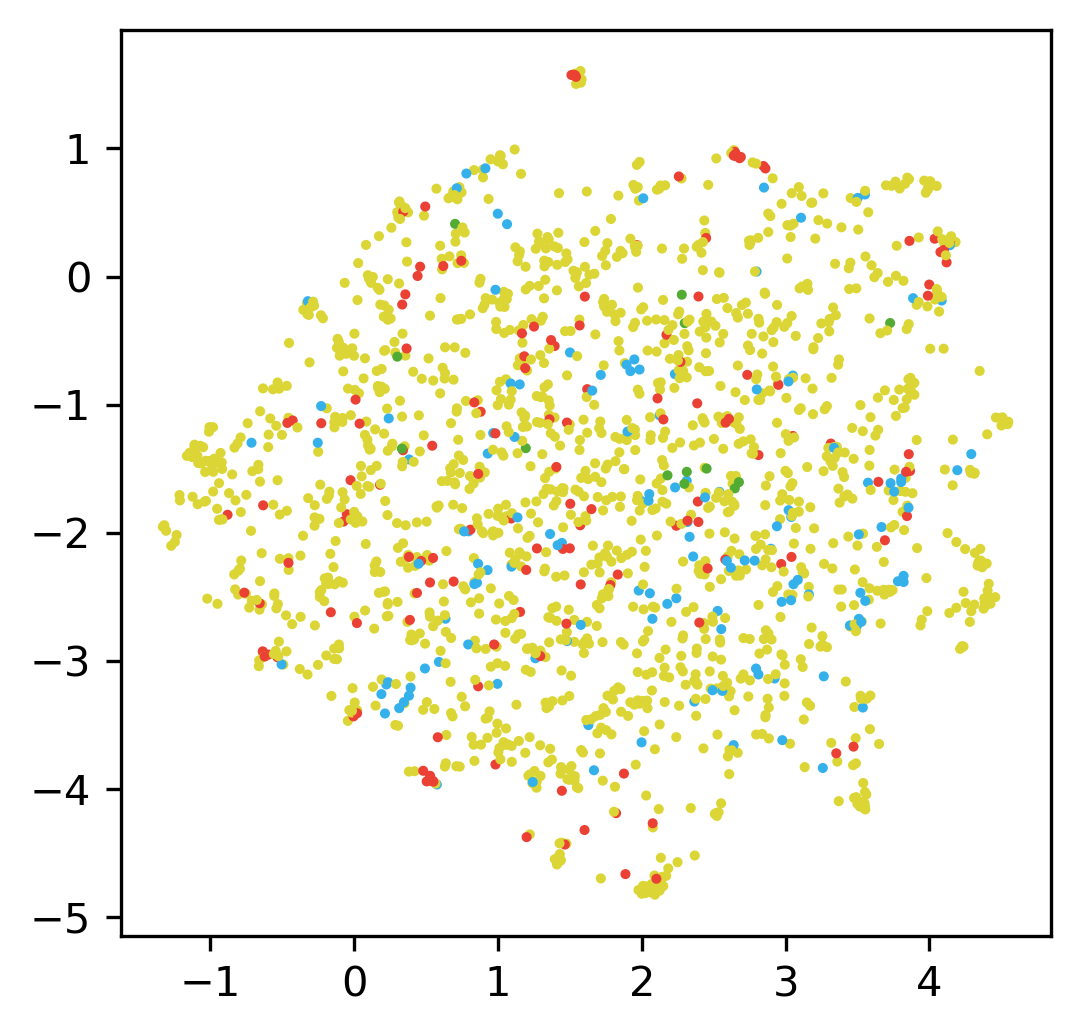

In [25]:
# create a plot of the word vectors
# reduce to two dimensions
reducer = umap.UMAP(metric='cosine', n_components=2, n_neighbors=15, min_dist=0.00, random_state=0)

# X holds the word vectors for all words in vocabulary
X = word2vec.syn1neg

# transform to two dimensions
embedding = reducer.fit_transform(X[:,:])

# plot projected word vectors
plt.figure(figsize=(4,4), dpi=300)

# scatterplot of projected word vectors
colors = {"INSULT": '#eb4034',
          "OTHER": "#dbd635",
          "ABUSE": '#34b1eb',
          "PROFANITY": "#52ab32"}

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = [colors.get(cat, " ") for cat in list(category_dict.values())[:]],
    s = 2
    )

In [26]:
# maybe we should plot this with 3 dimensions 

## Classify new tweets

In [27]:
# calculate center of mass vector for list of words (used here for article as
# collection of words)
def get_com_vector(words : list) -> np.array:
    # list of words in the word2vec model
    words = [word for word in words if word in word2vec.wv.index_to_key]
    # get the vectors
    vectors = np.array([word2vec.wv.get_vector(word) for word in words])
    # return the sum of all vectors devided by the amount of words from words in the model
    vector = np.sum(vectors, axis=0)
    return vector / len(words)

# get vector for each tweet
tweet_vectors = []
for word in tweet_words:
    vec = get_com_vector(word)
    tweet_vectors.append(vec)


/var/folders/gz/m10sqzrs1zv7071q82xq75fh0000gn/T/ipykernel_2783/2845102035.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return vector / len(words)


In [28]:
# calculate cosine similartiy between two vectors
def cos_sim(vec0: np.array, vec1: np.array) -> float:
    return np.dot(vec0, vec1)/(np.linalg.norm(vec0)*np.linalg.norm(vec1))

In [46]:
# classify a vector by comparing cosine similarity to known article vectors
def classify_tweet(tweet_vectors: np.array, new_tweet_vector: np.array):

    # split tweet_vectors into categorys
    tweet_vectors_insult = [
                                  tweet_vectors[i]
                                  for i in range(len(tweet_vectors))
                                  if (data_pre["granulareKlassifikation"][i]=='INSULT')
                                ]

    tweet_vectors_abuse = [
                               tweet_vectors[i]
                               for i in range(len(tweet_vectors))
                               if (data_pre["granulareKlassifikation"][i]=='ABUSE')
                            ]
    
    tweet_vectors_other = [
                               tweet_vectors[i]
                               for i in range(len(tweet_vectors))
                               if (data_pre["granulareKlassifikation"][i]=='OTHER')
                            ]
    tweet_vectors_profanity = [
                               tweet_vectors[i]
                               for i in range(len(tweet_vectors))
                               if (data_pre["granulareKlassifikation"][i]=='PROFANITY')
                            ]
    # calculate similarities between new_article_vector and known
    # article_vectors for all categories
    sims_insult = [
                    cos_sim(new_tweet_vector, av)
                    for av in tweet_vectors_insult
                ]
    
    # drop nas
    sims_insult = [x for x in sims_insult if not hasattr(x, "__len__")]
    
    sims_abuse = [
                    cos_sim(new_tweet_vector, av)
                    for av in tweet_vectors_abuse
                 ]
    # drop nas
    sims_abuse = [x for x in sims_abuse if not hasattr(x, "__len__")]
    
    sims_other = [
                    cos_sim(new_tweet_vector, av)
                    for av in tweet_vectors_other
                 ]
    # drop nas
    sims_other = [x for x in sims_other if not hasattr(x, "__len__")]
    
    sims_profanity = [
                    cos_sim(new_tweet_vector, av)
                    for av in tweet_vectors_profanity
                 ]
    # drop nas
    sims_profanity = [x for x in sims_profanity if not hasattr(x, "__len__")]
    
    # calculate avg similarities
    sims = [np.sum(sims_insult)/len(sims_insult), np.sum(sims_abuse)/len(sims_abuse),
           np.sum(sims_other)/len(sims_other), np.sum(sims_profanity)/len(sims_profanity)]

    # choose topic with higher similarity
    topic = ["INSULT", "ABUSE", "OTHER", "PROFANITY"][np.argmax(sims)]
    return topic, sims

In [47]:
# function to preprocess and transform new tweets
def new_tweet_vector(tweet : str):
    prep_new = process_tweets(tweet)
    doc_new = nlp(prep_new)

    words_new = [
                    word.lemma_ for word in doc_new
                    if (not word.is_stop) and (len(word)>2)
                 ]

    # calculate vector for new article
    new_tweet_vector = get_com_vector(words_new)

    return new_tweet_vector

In [48]:
# create predictions with test data
# classify_tweet(tweet_vectors, new_tweet_vector(data_test.tweet[757]))
cat_predictions = [classify_tweet(tweet_vectors, new_tweet_vector(x))[0] for x in data_test.tweet]


/var/folders/gz/m10sqzrs1zv7071q82xq75fh0000gn/T/ipykernel_2783/2845102035.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return vector / len(words)
/var/folders/gz/m10sqzrs1zv7071q82xq75fh0000gn/T/ipykernel_2783/800640678.py:60: RuntimeWarning: invalid value encountered in double_scalars
  np.sum(sims_other)/len(sims_other), np.sum(sims_profanity)/len(sims_profanity)]


In [49]:
# evaluate predictions
acc = 0
for i in range(len(cat_predictions)):
    if cat_predictions[i] == data_test["granulareKlassifikation"][i]:
        acc += 1
accuracy = acc / len(cat_predictions)        

In [50]:
accuracy

0.1741424802110818

In [33]:
    tweet_vectors_insult = [
                                  tweet_vectors[10]
                                  for i in range(len(tweet_vectors))
                                  if (data_pre["granulareKlassifikation"][10]=='INSULT')
                                ]

In [51]:
cat_predictions[:10]

['ABUSE',
 'ABUSE',
 'ABUSE',
 'PROFANITY',
 'ABUSE',
 'ABUSE',
 'ABUSE',
 'ABUSE',
 'INSULT',
 'ABUSE']

In [53]:
data_test["granulareKlassifikation"][:10]

0     ABUSE
1    INSULT
2    INSULT
3    INSULT
4    INSULT
5    INSULT
6    INSULT
7     OTHER
8     OTHER
9     OTHER
Name: granulareKlassifikation, dtype: object